In [2]:
import pandas as pd
crime = pd.read_csv("../crime.csv")

crime.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


In [3]:
crime = crime[crime["IS_CRIME"] == 1].drop(columns=["IS_CRIME", "IS_TRAFFIC"])

In [4]:
crime.isna().sum()

INCIDENT_ID                    0
OFFENSE_ID                     0
OFFENSE_CODE                   0
OFFENSE_CODE_EXTENSION         0
OFFENSE_TYPE_ID                0
OFFENSE_CATEGORY_ID            0
FIRST_OCCURRENCE_DATE          0
LAST_OCCURRENCE_DATE      198443
REPORTED_DATE                  0
INCIDENT_ADDRESS           30102
GEO_X                       4044
GEO_Y                       4044
GEO_LON                     4044
GEO_LAT                     4044
DISTRICT_ID                    0
PRECINCT_ID                    0
NEIGHBORHOOD_ID                0
dtype: int64

Omdat er geen First Occurence Dates ontbreken is het handig om daarmee te werken.

In [5]:
#maak een kopie en laat de orginele data in tact voor anderen (en ook omdat pandas dan minder zeurt)
crime_relevant = crime[["OFFENSE_CODE","OFFENSE_CODE_EXTENSION","FIRST_OCCURRENCE_DATE"]].copy()
crime_relevant.head()

,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,FIRST_OCCURRENCE_DATE
0,5213,0,6/15/2016 11:31:00 PM
1,2399,0,10/11/2017 12:30:00 PM
2,2305,0,3/4/2016 8:00:00 PM
3,2399,0,1/30/2018 7:20:00 PM
4,2303,0,6/22/2017 8:53:00 PM


In [6]:
string = "6/22/2017 8:53:00 PM"

string.split(' ')[0].split('/')[2]

'2017'

In [7]:
crime_relevant["FIRST_OCCURRENCE_DATE"] = crime_relevant["FIRST_OCCURRENCE_DATE"].str.split(' ').str[0]
crime_relevant["FIRST_OCCURRENCE_DATE"] = crime_relevant["FIRST_OCCURRENCE_DATE"].str.split('/').str[2]
crime_relevant = crime_relevant.rename(columns={"FIRST_OCCURRENCE_DATE":"YEAR"})
crime_relevant.head()

,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,YEAR
0,5213,0,2016
1,2399,0,2017
2,2305,0,2016
3,2399,0,2018
4,2303,0,2017


De first occurence date is geen datum meer! Is nu veranderd naar het jaar, deze kolom is nu ook hernoemd om dit aan te geven.

In [8]:
crime_relevant['count'] = 1

crime_relevant_gb = crime_relevant.groupby(["OFFENSE_CODE","OFFENSE_CODE_EXTENSION","YEAR"]).count().reset_index()

crime_relevant_gb

,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,YEAR,count
0,902,0,2015,2
1,902,0,2016,6
2,902,0,2017,2
3,902,0,2018,4
4,902,0,2019,10
...,...,...,...,...
1038,7399,3,2016,24
1039,7399,3,2017,20
1040,7399,3,2018,34
1041,7399,3,2019,20


Ik ga proberen om voor ieder jaar de vijf meest voorkomende misdaden uit te filteren (per jaar!), hoop dat er iets interesants uitkomt.

Hiervoor is het misschien eerst handig dat de crime codes eerst worden omgezet naar leesbare misdaden

In [9]:
offence_codes = pd.read_csv('../offense_codes.csv')

offence_codes.head()

,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_ID,OFFENSE_CATEGORY_NAME,IS_CRIME,IS_TRAFFIC
0,2804,1,stolen-property-possession,Possession of stolen property,all-other-crimes,All Other Crimes,1,0
1,2804,2,fraud-possess-financial-device,Possession of a financial device,all-other-crimes,All Other Crimes,1,0
2,2901,0,damaged-prop-bus,Damaged business property,public-disorder,Public Disorder,1,0
3,2902,0,criminal-mischief-private,Criminal mischief to private property,public-disorder,Public Disorder,1,0
4,2903,0,criminal-mischief-public,Criminal mischief to public property,public-disorder,Public Disorder,1,0


In [10]:
offence_codes_relevant = offence_codes[['OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION', 'OFFENSE_TYPE_NAME']].copy()

In [11]:
crime_merged = crime_relevant_gb.merge(offence_codes_relevant, on=["OFFENSE_CODE", "OFFENSE_CODE_EXTENSION"])
crime_merged.head()

,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,YEAR,count,OFFENSE_TYPE_NAME
0,902,0,2015,2,Homicide by a family member
1,902,0,2016,6,Homicide by a family member
2,902,0,2017,2,Homicide by a family member
3,902,0,2018,4,Homicide by a family member
4,902,0,2019,10,Homicide by a family member


is deze merge ook daadwerkenlijk gelukt?

In [12]:
crime_merged["OFFENSE_TYPE_NAME"].describe()

count                           1043
unique                           196
top       Violation of a court order
freq                              12
Name: OFFENSE_TYPE_NAME, dtype: object

Zeker, nu kunnen de offence_codes weg. tegelijkertijd reorder ik de dataframe.

In [13]:
crime_merged.drop(columns=["OFFENSE_CODE_EXTENSION", "OFFENSE_CODE"])
crime_merged = crime_merged[["YEAR","OFFENSE_TYPE_NAME", "count"]]
crime_merged.head()

,YEAR,OFFENSE_TYPE_NAME,count
0,2015,Homicide by a family member,2
1,2016,Homicide by a family member,6
2,2017,Homicide by a family member,2
3,2018,Homicide by a family member,4
4,2019,Homicide by a family member,10


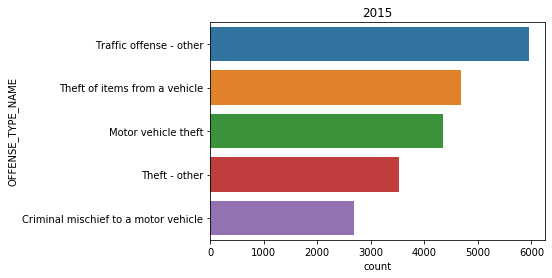

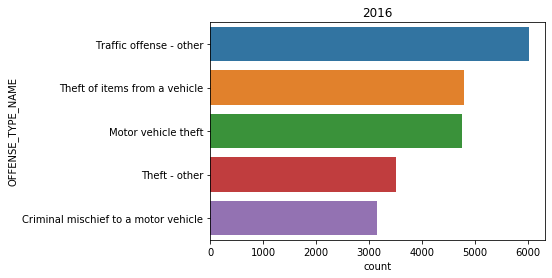

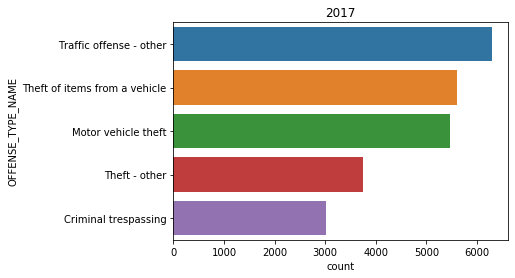

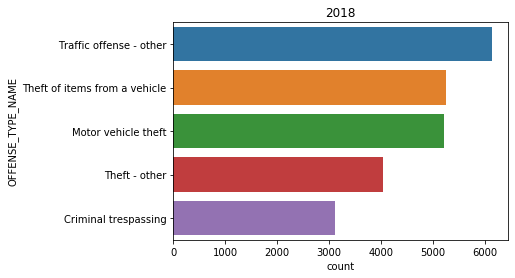

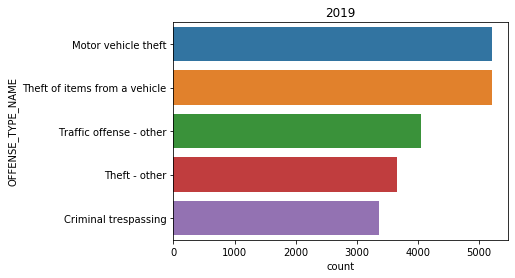

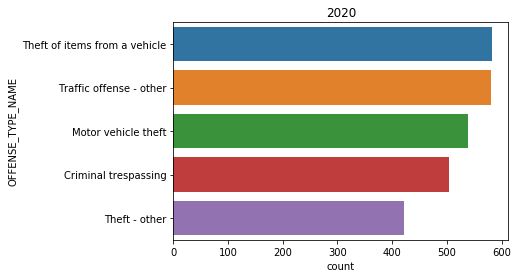

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

for year in crime_relevant.sort_values('YEAR')["YEAR"].unique():
    crime_merged[crime_merged["YEAR"] == year].sort_values('count', ascending=False).head()
    print('')
    plt.title(year)
    sns.barplot(data=crime_merged[crime_merged["YEAR"] == year].sort_values('count', ascending=False).head(), y='OFFENSE_TYPE_NAME', x='count')
    plt.show()

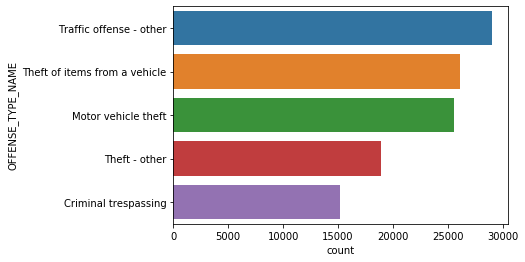

In [46]:
#het gaat hier om het totaal aantal crime jaar is niet meer belangrijk
crime_total = crime_merged.drop(columns='YEAR').groupby('OFFENSE_TYPE_NAME').sum().reset_index()
sns.barplot(data=crime_total.sort_values('count', ascending=False).head(), y='OFFENSE_TYPE_NAME', x='count')
plt.show()

Het ziet er naar uit dat `Traffic offence - other` vanaf 2016 tot en met 2018 bovenaan staat, daarna op de derde plek land en in 2020 naar plek twee klimt.

`Theft of items from a vehicle` staat vanaf 2015 op de tweede plek, maar klimt in 2020 naar de eerste plaats.

`Motor vehicle theft` staat vanaf 2015 tot 2018 op de derde plaats, neemt in 2019 de eerst plaats over om in 2020 weer op de derde plaats te komen.

`Theft - other` staat vanaf 2015 tot 2019 op de vierde plaats en daalt in 2020 naar de vijfde plaats.

`Criminal mischief to a motor vehicle` staat in de jaren 2015 en 2016 op plek vijf, deze plek wordt overgenomen door `Criminal trespassing` wat in 2020 zelfs naar de vierde plek stijgt.

Welke misdrijven er op jaarbasis het meeste plaatsvinden is vrij stabiel. De volghorde wijzigt wel er zijn weinig nieuwe misdrijven soorten misdrijven die de top vijf binnenkomen.